### Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


/tmp/ipykernel_22329/1920927039.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Import and explore data

In [2]:
df = pd.read_csv('heart.csv')


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no non-null values

### Shape of the input dataframe

In [6]:
X = df.drop('target', axis=1)

print('Inputs Dataframe shape   :', X.shape)

Inputs Dataframe shape   : (303, 13)


Calculating Mean and Standard Deviation

In [7]:
X_mean = X.mean()
 
X_std = X.std()
 
Z = (X - X_mean) / X_std

Covariance Matrix

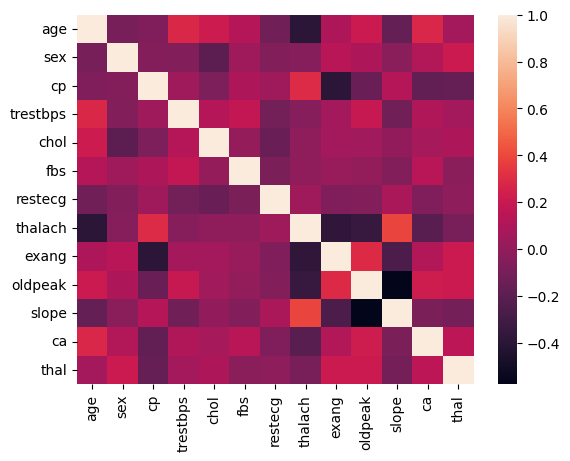

In [8]:
# covariance
c = Z.cov()

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

The covariance matrix shows how much two features are dependent on each other

In [15]:

from sklearn.decomposition import PCA
 
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(Z)
x_pca = pca.transform(Z)
print(x_pca.shape)
 
# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i)
                        for i in range(n_components)])
print(df_pca1)

(303, 2)
          PC0       PC1
0    0.623080  2.317437
1   -0.455235 -0.955770
2   -1.825785  0.042814
3   -1.713172 -0.494519
4   -0.370743  0.300659
..        ...       ...
298  1.144778 -0.518671
299 -0.707423 -1.044025
300  2.454944  0.477472
301  1.759844 -2.332957
302 -0.858636  1.066751

[303 rows x 2 columns]


No of Principal components is decided by the n_components

### Plotting the two Principal components obtained

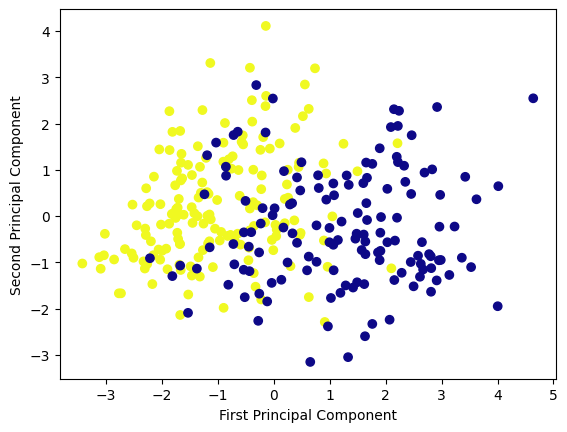

In [16]:
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=df['target'],
            cmap='plasma')
 
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()